In [14]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import reuters

from keras import optimizers
from keras import losses
from keras import metrics

from keras import models
from keras import layers

In [2]:
(train_data,train_labels),(test_data,test_labels) =reuters.load_data("reuters.npz",num_words=10000)
# word_index= reuters.get_word_index()
# reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for (i, sequence) in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [4]:
# 划分测试集和训练集
x_train = vectorize_sequences(train_data)
x_test =vectorize_sequences(test_data)

In [6]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [7]:
# 在训练集中划分验证集
x_val = x_train[:1000]
partial_x_val = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_val = one_hot_train_labels[1000:]

In [8]:
# 建模

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])
# 拟合
history = model.fit(partial_x_val,
                    partial_y_val,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [15]:
history_dict=history.history
print(history_dict.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


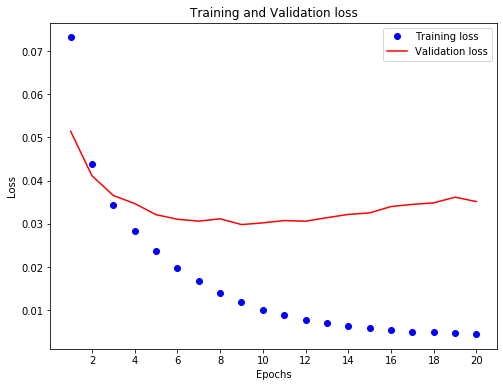

In [20]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(8, 6))
plt.xticks(range(0, 21, 2))
plt.plot(epochs, loss_values, 'bo', label="Training loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

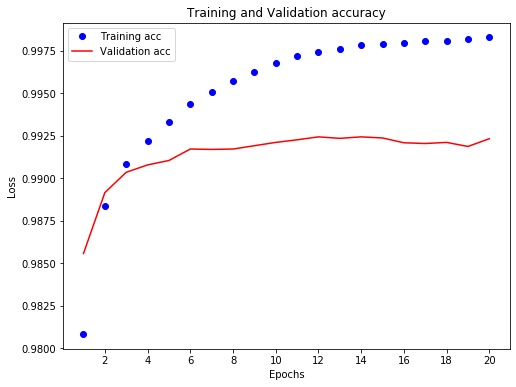

In [21]:
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']
epochs = range(1,len(val_accuracy)+1)

plt.figure(figsize=(8,6))
plt.xticks(range(0,len(val_accuracy)+1,2))
plt.plot(epochs,accuracy,'bo',label="Training acc")
plt.plot(epochs,val_accuracy,'r',label="Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [24]:
# 建模

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.binary_crossentropy,
              metrics=['accuracy'])
# 拟合
model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 3s 334us/step - loss: 0.0724 - acc: 0.9808
Epoch 2/9
8982/8982 [==============================] - 1s 160us/step - loss: 0.0406 - acc: 0.9891
Epoch 3/9
8982/8982 [==============================] - 1s 152us/step - loss: 0.0312 - acc: 0.9916
Epoch 4/9
8982/8982 [==============================] - 1s 161us/step - loss: 0.0256 - acc: 0.9930
Epoch 5/9
8982/8982 [==============================] - 1s 154us/step - loss: 0.0210 - acc: 0.9941
Epoch 6/9
8982/8982 [==============================] - 1s 155us/step - loss: 0.0175 - acc: 0.9949
Epoch 7/9
8982/8982 [==============================] - 1s 155us/step - loss: 0.0146 - acc: 0.9957
Epoch 8/9
8982/8982 [==============================] - 1s 153us/step - loss: 0.0123 - acc: 0.9962
Epoch 9/9
8982/8982 [==============================] - 1s 154us/step - loss: 0.0104 - acc: 0.9967


In [25]:
results= model.evaluate(x_test,one_hot_test_labels)
print(results)

2246/2246 [==============================] - 1s 343us/step
[0.03216614556944169, 0.9914534312746722]


In [26]:
predictions = model.predict(x_test)

In [29]:
predictions[0].shape

(46,)

In [32]:
np.argmax(predictions[0])

3

In [33]:
test_labels[0]

3